In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


file_path = r"C:\Users\nidhi\OneDrive\Desktop\projects\DA\linear regression\NIFTY 50.csv"
data = pd.read_csv(file_path)

# Displaying the first few rows of the dataframe
print(data.head())

         Date     Open     High      Low   Close    P/E   P/B Div Yield %
0  2000-01-03  1482.15  1592.90  1482.15  1592.2  25.91  4.63        0.95
1  2000-01-04  1594.40  1641.95  1594.40  1638.7  26.67  4.76        0.92
2  2000-01-05  1634.55  1635.50  1555.05  1595.8  25.97  4.64        0.95
3  2000-01-06  1595.80  1639.00  1595.80  1617.6  26.32  4.70        0.94
4  2000-01-07  1616.60  1628.25  1597.20  1613.3  26.25  4.69        0.94


In [4]:
# Check for missing values
print(data.isnull().sum())

# No missing values, so no need to handle them

# Splitting the data into features (X) and target variable (y)
# Splitting the data into features (X) and target variable (y)
X = data[['Open', 'High', 'Low', 'P/E', 'P/B','Div Yield %']]
y = data['Close']



Date           0
Open           0
High           0
Low            0
Close          0
P/E            0
P/B            0
Div Yield %    0
dtype: int64


In [7]:
#above outputs tells that there is no null values
# Check for non-numeric values in each column
for column in X.columns:
    non_numeric_values = X[column].apply(lambda x: not str(x).replace('.', '', 1).isdigit()).any()
    if non_numeric_values:
        print(f"Non-numeric values found in column '{column}'")



Non-numeric values found in column 'Div Yield %'


In [11]:
# Remove rows with non-numeric values in the 'Div Yield %' column
data_cleaned = data[~data['Div Yield %'].apply(lambda x: not str(x).replace('.', '', 1).isdigit())]

# Update the feature and target variables
X = data_cleaned[['Open', 'High', 'Low', 'P/E', 'P/B']]
y = data_cleaned['Close']


In [12]:
# Split the cleaned data into features (X) and target variable (y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)


LinearRegression()

Coefficient of determination (R^2) on testing set: 0.9999668719441146


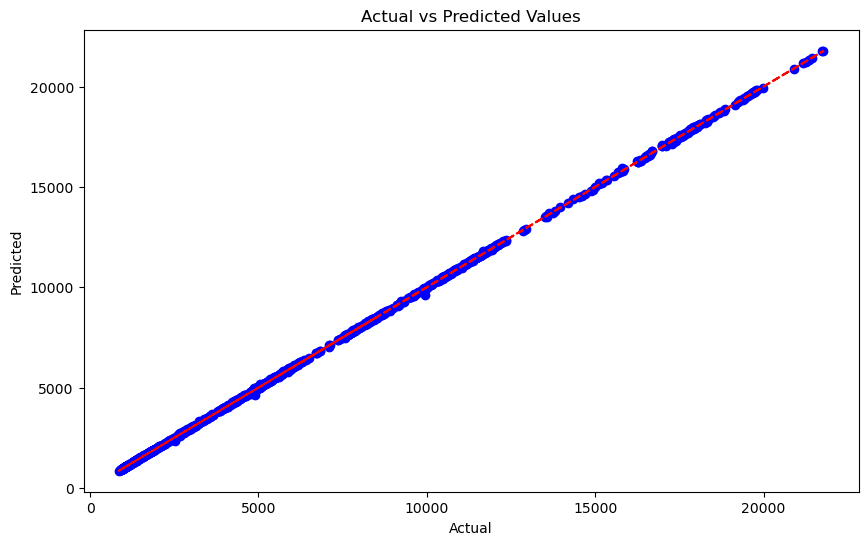

In [14]:
# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot(y_test, y_test, color='red', linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.show()


In [34]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Convert the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')

# Filter the data for relevant rows up to April 25, 2024
data_subset = data[data['Date'] <= '2024-04-25']

# Extract features (Open, High, Low) and target variable (Close)
X = data_subset[['Open', 'High', 'Low']]
y = data_subset['Close']

# Create and train a linear regression model
model = LinearRegression()
model.fit(X, y)

# Extract features for April 26, 2024 (replace with actual data if available)
new_data_point = {
    'Open': 22620.40,  # Replace with the actual Open value for April 26, 2024
    'High': 22620.40,  # Replace with the actual High value for April 26, 2024
    'Low': 22385.55    # Replace with the actual Low value for April 26, 2024
}

# Convert new_data_point to DataFrame
new_data = pd.DataFrame([new_data_point])

# Predict the Close price for April 26, 2024
predicted_close_price = model.predict(new_data[['Open', 'High', 'Low']])

print("Predicted Close Price for April 26, 2024:", predicted_close_price[0])


Predicted Close Price for April 26, 2024: 22447.392867855495
